<a href="https://colab.research.google.com/github/PadparadschaNero/Infosci301-Final/blob/main/Final_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Race.csv to Race.csv


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Optional: Set a default renderer if you suspect rendering issues
# pio.renderers.default = 'notebook' # Or 'vscode', 'browser', 'jupyterlab', etc.

# --- Load the Race Data ---
# Ensure this step is active or df_race_new exists from previous step
file_path_race = "Race.csv"
try:
    df_race_new = pd.read_csv(file_path_race)
    print(f"--- Reloaded Data from {file_path_race} ---")
    print(f"Shape: {df_race_new.shape}")

except FileNotFoundError:
    print(f"Error: File not found at {file_path_race}")
    df_race_new = pd.DataFrame() # Create an empty DataFrame
except UnicodeDecodeError:
    print(f"UnicodeDecodeError reading {file_path_race}. Trying with 'latin1' encoding...")
    try:
        df_race_new = pd.read_csv(file_path_race, encoding='latin1')
        print(f"--- Reloaded Data from {file_path_race} (read with latin1 encoding) ---")
        print(f"Shape: {df_race_new.shape}")
    except Exception as e_latin1:
        print(f"An error occurred while reading the file with latin1 encoding: {e_latin1}")
        df_race_new = pd.DataFrame() # Create an empty DataFrame
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    df_race_new = pd.DataFrame()


# Ensure df_race_new exists and is not empty before proceeding
if not df_race_new.empty:

    # Define the exact column names from the loaded data
    race_col = 'Race/ethnicity'
    rate_col = 'Age-adjusted rate per 100,000 population'

    # Ensure required columns exist
    if race_col in df_race_new.columns and rate_col in df_race_new.columns:

        print("--- Preparing Data for Horizontal Bar Chart ---")
        # Sort data by rate in descending order (highest rate at the top in horizontal chart)
        df_race_sorted = df_race_new.sort_values(by=rate_col, ascending=True) # Ascending sort for horizontal top-down display

        print("--- Generating Interactive Horizontal Bar Chart ---")
        # Create the interactive HORIZONTAL bar chart by swapping x and y
        fig_bar_race_h = px.bar(
            df_race_sorted,
            x=rate_col,         # Rate on x-axis (length of bars)
            y=race_col,         # Categories on y-axis
            orientation='h',    # Explicitly set orientation to horizontal
            color=race_col,     # Color bars by category (optional)
            title='Comparison of Age-Adjusted Suicide Rates by Race/Ethnicity',
            labels={            # Set axis labels (swapped)
                race_col: 'Race / Ethnicity',
                rate_col: 'Age-Adjusted Rate per 100,000'
            },
            text=rate_col       # Show the rate value alongside the bars
        )

        # Improve appearance and readability
        fig_bar_race_h.update_traces(
            texttemplate='%{text:.1f}', # Format text
            textposition='outside'     # Position text outside bars
        )
        fig_bar_race_h.update_layout(
            # xaxis_title="Age-Adjusted Rate per 100,000", # Set x-axis title
            yaxis_title=None, # Remove y-axis title (category names are clear)
            uniformtext_minsize=8,
            uniformtext_mode='hide',   # Hide text if it doesn't fit
            showlegend=False           # Hide legend since colors match y-axis labels
        )
        # Ensure categories display in the sorted order (highest rate at top)
        # This might not be strictly necessary if df is sorted and px respects it
        fig_bar_race_h.update_yaxes(categoryorder="total ascending")


        fig_bar_race_h.show()
    else:
        print(f"Error: Required columns ('{race_col}', '{rate_col}') not found in the DataFrame. Cannot generate bar chart.")

else:
    print("DataFrame 'df_race_new' could not be loaded or is empty. Cannot generate bar chart.")

--- Reloaded Data from Race.csv ---
Shape: (7, 2)
--- Preparing Data for Horizontal Bar Chart ---
--- Generating Interactive Horizontal Bar Chart ---


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Optional: Set a default renderer if you suspect rendering issues
# pio.renderers.default = 'notebook' # Or 'vscode', 'browser', 'jupyterlab', etc.

# --- Load the NEW Suicide Method Data ---
# Ensure this step is active within this code block
file_path_method = "Suicide_method.csv"
try:
    # Attempt to read with default encoding first
    df_method = pd.read_csv(file_path_method)
    print(f"--- Reloaded Data from {file_path_method} ---")
    print(f"Shape: {df_method.shape}")

except FileNotFoundError:
    print(f"Error: File not found at {file_path_method}")
    df_method = pd.DataFrame() # Create an empty DataFrame
except UnicodeDecodeError:
    print(f"UnicodeDecodeError reading {file_path_method}. Trying with 'latin1' encoding...")
    try:
        # Try reading with latin1 encoding if default fails
        df_method = pd.read_csv(file_path_method, encoding='latin1')
        print(f"--- Reloaded Data from {file_path_method} (read with latin1 encoding) ---")
        print(f"Shape: {df_method.shape}")
    except Exception as e_latin1:
        print(f"An error occurred while reading the file with latin1 encoding: {e_latin1}")
        df_method = pd.DataFrame() # Create an empty DataFrame
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    df_method = pd.DataFrame()


# Ensure df_method exists and is not empty before proceeding
if not df_method.empty:

    print("--- Preparing Data for Donut Chart ---")
    # Clean the 'Count' column: remove commas and convert to numeric
    try:
        # Make sure 'Count' column exists before trying to clean
        if 'Count' in df_method.columns:
            df_method['Count_Clean'] = df_method['Count'].astype(str).str.replace(',', '', regex=False)
            df_method['Count_Clean'] = pd.to_numeric(df_method['Count_Clean'], errors='coerce')
            print("Successfully cleaned 'Count' column.")
        else:
            print("Warning: 'Count' column not found. Cannot clean.")
            df_method['Count_Clean'] = pd.NA # Assign NA if column missing

    except Exception as e_clean:
        print(f"Could not clean 'Count' column: {e_clean}")
        # Add an empty column if cleaning fails, to prevent error in hover_data
        df_method['Count_Clean'] = pd.NA


    # Ensure required columns exist before plotting
    if 'Method' in df_method.columns and 'Percent' in df_method.columns:
        print("--- Generating Donut Chart with Centered Title ---")
        # Create the donut chart
        chart_title = 'Distribution of Suicide Methods by Percentage' # Define title
        fig_donut = px.pie(
            df_method,
            names='Method',          # Categories for slices
            values='Percent',        # Size of slices based on percentage
            hole=0.4,                # Makes it a donut chart
            title=chart_title,       # Set title here initially
            hover_name='Method',     # Show method name in bold on hover
            # hover_data parameter is simplified as customdata handles it below
        )

        # Customize hover template for better display including the cleaned count
        # Check if 'Count_Clean' exists and is not all NA before adding to customdata
        custom_data_cols = ['Percent']
        hover_template_parts = [
            "<b>%{label}</b><br><br>",
            "Percent: %{customdata[0]:.2f}%<br>"
        ]
        if 'Count_Clean' in df_method.columns and not df_method['Count_Clean'].isna().all():
            custom_data_cols.append('Count_Clean')
            # The index for Count_Clean in customdata will be 1
            hover_template_parts.append("Count: %{customdata[1]:,d}<br>")

        hover_template_parts.append("<extra></extra>") # Removes the secondary box

        # Apply customdata and hovertemplate
        fig_donut.update_traces(
            customdata=df_method[custom_data_cols],
            hovertemplate="".join(hover_template_parts),
            textinfo='percent+label', # Add text labels to the slices
            textposition='outside'    # Move labels outside for clarity
        )


        # --- THIS IS THE KEY PART FOR CENTERING THE TITLE ---
        # Improve layout AND center the title
        fig_donut.update_layout(
            title_text=chart_title,  # Explicitly set title text again (optional but clear)
            title_x=0.5,             # Set horizontal position to center (0.5)
            title_xanchor='center',  # Anchor title's center to the x position
            uniformtext_minsize=10,
            uniformtext_mode='hide' # Prevent text overlap issues
            )
        # --- END OF KEY PART ---

        fig_donut.show()
    else:
        print("Error: Required columns ('Method', 'Percent') not found in the DataFrame. Cannot generate donut chart.")


else:
    print("DataFrame 'df_method' could not be loaded or is empty. Cannot generate donut chart.")

--- Reloaded Data from Suicide_method.csv ---
Shape: (4, 3)
--- Preparing Data for Donut Chart ---
Successfully cleaned 'Count' column.
--- Generating Donut Chart with Centered Title ---


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Optional: Set a default renderer if you suspect rendering issues
# pio.renderers.default = 'notebook' # Or 'vscode', 'browser', 'jupyterlab', etc.

# --- Load Data ---
# Ensure you have the correct path to your CSV file
file_path = "Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv"
try:
    df = pd.read_csv(file_path)
    print("--- Original DataFrame Info ---")
    print(f"Shape: {df.shape}")
    print("Original DataFrame loaded successfully.")
    print("\n")

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    df = pd.DataFrame() # Create an empty DataFrame to prevent further errors


if not df.empty:
    # --- Plot 1: Suicide Rates by Sex Over Time (Age-Adjusted/All Ages) ---
    print("--- Preparing Data for Plot 1 (Sex) ---")
    # Initial Filter for Plot 1
    df_sex_raw = df[
        ((df['STUB_NAME'] == 'Sex') | (df['STUB_NAME'] == 'Total')) &
        (df['AGE'] == 'All ages')
    ].copy()

    print(f"Raw data shape before duplicate check: {df_sex_raw.shape}")

    # Check for duplicates based on YEAR and STUB_LABEL
    duplicates = df_sex_raw[df_sex_raw.duplicated(subset=['YEAR', 'STUB_LABEL'], keep=False)]
    if not duplicates.empty:
        print(f"Found {duplicates.shape[0]} duplicate rows based on YEAR and STUB_LABEL. Example:")
        print(duplicates.head().to_markdown(index=False))
        # Drop duplicates, keeping the first occurrence
        df_sex_deduped = df_sex_raw.drop_duplicates(subset=['YEAR', 'STUB_LABEL'], keep='first').copy()
        print(f"Data shape after dropping duplicates: {df_sex_deduped.shape}")
    else:
        print("No duplicate rows found based on YEAR and STUB_LABEL.")
        df_sex_deduped = df_sex_raw # Use the raw data if no duplicates

    # Filter years: Keep only 1981 onwards
    print("Filtering Plot 1 data for YEAR >= 1981...")
    df_sex_final = df_sex_deduped[df_sex_deduped['YEAR'] >= 1981].copy()
    print(f"Final data shape for Plot 1: {df_sex_final.shape}")

    # Sort by year
    df_sex_final = df_sex_final.sort_values('YEAR')

    # Only create the plot if final data is not empty
    if not df_sex_final.empty:
        print("--- Generating Corrected Plot 1 (Sex, Year >= 1981, Duplicates Removed) ---")
        fig_sex = px.line(
            df_sex_final,
            x='YEAR',
            y='ESTIMATE',
            color='STUB_LABEL',
            title='Suicide Death Rates by Sex Over Time (1981 onwards)',
            labels={
                'YEAR': 'Year',
                'ESTIMATE': 'Deaths per 100,000 Population',
                'STUB_LABEL': 'Category'
            },
            markers=True,
            template='plotly_white',
            hover_name='STUB_LABEL',
            hover_data={'YEAR': True, 'ESTIMATE': ':.1f', 'STUB_LABEL': False}
        )
        fig_sex.show()
        print("\n")
    else:
        print("Skipping Plot 1 generation: Final data is empty after filtering.")


    # --- Plot 2: Suicide Rates by Age Group Over Time ---
    print("--- Preparing Data for Plot 2 (Age) ---")
    import pandas as pd
import plotly.express as px
import plotly.io as pio

# Optional: Set a default renderer if you suspect rendering issues
# pio.renderers.default = 'notebook' # Or 'vscode', 'browser', 'jupyterlab', etc.

# --- Load Data ---
# Use the first dataset
file_path = "Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv"
try:
    df = pd.read_csv(file_path)
    print("--- Original DataFrame Info ---")
    print(f"Shape: {df.shape}")
    print("Original DataFrame loaded successfully.")
    print("\n")

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    df = pd.DataFrame() # Create an empty DataFrame to prevent further errors


if not df.empty:
    # --- Plot 1: Suicide Rates by Sex Over Time ---
    # (Keeping this plot generation as finalized previously)
    print("--- Preparing Data for Plot 1 (Sex) ---")
    df_sex_raw = df[
        ((df['STUB_NAME'] == 'Sex') | (df['STUB_NAME'] == 'Total')) &
        (df['AGE'] == 'All ages')
    ].copy()
    df_sex_deduped = df_sex_raw.drop_duplicates(subset=['YEAR', 'STUB_LABEL'], keep='first').copy()
    print("Filtering Plot 1 data for YEAR >= 1981...")
    df_sex_final = df_sex_deduped[df_sex_deduped['YEAR'] >= 1981].copy()
    print(f"Final data shape for Plot 1: {df_sex_final.shape}")
    df_sex_final = df_sex_final.sort_values('YEAR')

    if not df_sex_final.empty:
        print("--- Generating Corrected Plot 1 (Sex, Year >= 1981, Duplicates Removed) ---")
        fig_sex = px.line(
            df_sex_final, x='YEAR', y='ESTIMATE', color='STUB_LABEL',
            title='Suicide Death Rates by Sex Over Time (1981 onwards)',
            labels={'YEAR': 'Year', 'ESTIMATE': 'Deaths per 100,000 Population', 'STUB_LABEL': 'Category'},
            markers=True, template='plotly_white',
            hover_name='STUB_LABEL', hover_data={'YEAR': True, 'ESTIMATE': ':.1f', 'STUB_LABEL': False}
        )
        fig_sex.show()
        print("\n")
    else:
        print("Skipping Plot 1 generation: Final data is empty after filtering.")


    # --- Plot 2: Suicide Rates by Specific Age Groups Over Time ---
    print("--- Preparing Data for Plot 2 (Age) ---")
    # Base filter: STUB_NAME is 'Age'
    df_age_base = df[
        (df['STUB_NAME'] == 'Age') &
        (df['AGE'] != 'All ages')
    ].copy()

    print(f"Base data shape for Plot 2 (STUB_NAME=='Age'): {df_age_base.shape}")

    # Define the EXACT age groups requested by the user
    age_groups_to_keep = [
        '10-14 years',
        '15-19 years', # Specific sub-group
        '20-24 years', # Specific sub-group
        '25-34 years', # Specific sub-group
        '35-44 years', # Specific sub-group
        '45-54 years', # Specific sub-group
        '55-64 years', # Specific sub-group
        '65 years and over' # Overall group for 65+
    ]
    print(f"Filtering Plot 2 data to keep only these specific age groups: {age_groups_to_keep}")
    # Filter based on the user's list
    df_age_filtered_groups = df_age_base[df_age_base['AGE'].isin(age_groups_to_keep)].copy()
    print(f"Shape after filtering specific age groups: {df_age_filtered_groups.shape}")


    # Check for duplicates within the filtered data
    duplicates_age = df_age_filtered_groups[df_age_filtered_groups.duplicated(subset=['YEAR', 'AGE'], keep=False)]
    if not duplicates_age.empty:
        print(f"Found {duplicates_age.shape[0]} duplicate rows for Plot 2 based on YEAR and AGE.")
        df_age_deduped = df_age_filtered_groups.drop_duplicates(subset=['YEAR', 'AGE'], keep='first').copy()
        print(f"Plot 2 data shape after dropping duplicates: {df_age_deduped.shape}")
    else:
        print("No duplicate rows found for Plot 2 based on YEAR and AGE.")
        df_age_deduped = df_age_filtered_groups


    # Filter years: Keep only 1981 onwards
    print("Filtering Plot 2 data for YEAR >= 1981...")
    df_age_final = df_age_deduped[df_age_deduped['YEAR'] >= 1981].copy()
    print(f"Final data shape for Plot 2: {df_age_final.shape}")

    # Sort by year and age
    df_age_final = df_age_final.sort_values(['AGE', 'YEAR'])

    # Only create the plot if final data is not empty
    if not df_age_final.empty:
        print("--- Generating Corrected Plot 2 (User-Specified Age Groups, Year >= 1981) ---")
        fig_age = px.line(
            df_age_final,
            x='YEAR',
            y='ESTIMATE',
            color='AGE', # Color by the specified AGE groups
            title='Suicide Death Rates by Specified Age Groups Over Time (1981 onwards)', # Updated title
            labels={
                'YEAR': 'Year',
                'ESTIMATE': 'Deaths per 100,000 Population',
                'AGE': 'Age Group' # Legend title
            },
            markers=True,
            template='plotly_white',
            hover_name='AGE',
            hover_data={'YEAR': True, 'ESTIMATE': ':.1f', 'AGE': False}
        )
        fig_age.show()
    else:
        print("Skipping Plot 2 generation: Final data is empty after filtering.")

else:
    print("Original DataFrame is empty, cannot proceed.")

--- Original DataFrame Info ---
Shape: (6390, 13)
Original DataFrame loaded successfully.


--- Preparing Data for Plot 1 (Sex) ---
Raw data shape before duplicate check: (252, 13)
Found 252 duplicate rows based on YEAR and STUB_LABEL. Example:
| INDICATOR               | UNIT                                                 |   UNIT_NUM | STUB_NAME   |   STUB_NAME_NUM | STUB_LABEL   |   STUB_LABEL_NUM |   YEAR |   YEAR_NUM | AGE      |   AGE_NUM |   ESTIMATE |   FLAG |
|:------------------------|:-----------------------------------------------------|-----------:|:------------|----------------:|:-------------|-----------------:|-------:|-----------:|:---------|----------:|-----------:|-------:|
| Death rates for suicide | Deaths per 100,000 resident population, age-adjusted |          1 | Total       |               0 | All persons  |                0 |   1950 |          1 | All ages |         0 |       13.2 |    nan |
| Death rates for suicide | Deaths per 100,000 resident population, 



--- Preparing Data for Plot 2 (Age) ---
--- Original DataFrame Info ---
Shape: (6390, 13)
Original DataFrame loaded successfully.


--- Preparing Data for Plot 1 (Sex) ---
Filtering Plot 1 data for YEAR >= 1981...
Final data shape for Plot 1: (114, 13)
--- Generating Corrected Plot 1 (Sex, Year >= 1981, Duplicates Removed) ---




--- Preparing Data for Plot 2 (Age) ---
Base data shape for Plot 2 (STUB_NAME=='Age'): (588, 13)
Filtering Plot 2 data to keep only these specific age groups: ['10-14 years', '15-19 years', '20-24 years', '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65 years and over']
Shape after filtering specific age groups: (336, 13)
No duplicate rows found for Plot 2 based on YEAR and AGE.
Filtering Plot 2 data for YEAR >= 1981...
Final data shape for Plot 2: (304, 13)
--- Generating Corrected Plot 2 (User-Specified Age Groups, Year >= 1981) ---


In [ ]:
import pandas as pd
df = pd.read_csv('lcd-table.csv')
df.head()

,Age Group,Rank,Cause Category,Deaths,Crude Rate,Percentage
0,<1,1.0,Congenital Anomalies,"4,005",109.8,30.4%
1,<1,2.0,Short Gestation,"2,922",80.1,22.2%
2,<1,3.0,Sids,"1,445",39.6,11.0%
3,<1,4.0,Unintentional Injury,"1,291",35.4,9.8%
4,<1,5.0,Maternal Pregnancy Comp.,"1,141",31.3,8.7%


In [ ]:
import pandas as pd

# --- Load the NEW Suicide Method Data ---
file_path_method = "Suicide_method.csv"
try:
    df_method = pd.read_csv(file_path_method)
    print(f"--- Data from {file_path_method} ---")
    print(f"Shape: {df_method.shape}")
    print("\nFirst 5 rows:")
    print(df_method.head().to_markdown(index=False))
    print("\nColumn Info:")
    print(df_method.info())

except FileNotFoundError:
    print(f"Error: File not found at {file_path_method}")
    df_method = pd.DataFrame() # Create an empty DataFrame
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    df_method = pd.DataFrame()

In [ ]:
#uploaded = files.upload()
df2 = pd.read_csv('combined_processed_data.csv')
df2.head()

,Region Name,Country Name,Year,Sex,0 Year,1-4 Years,5-9 Years,10-14 Years,15-19 Years,20-24 Years,...,60-64 Years,65-69 Years,70-74 Years,75-79 Years,80-84 Years,85+ Years,Unknown Age,No of Suicides,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population
0,Africa,Cabo Verde,1980,Female,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.227273,0.000000
1,Africa,Cabo Verde,1980,Male,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,0.983156,0.000000
2,Africa,Cabo Verde,2011,Female,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.161273,2.395998
3,Africa,Cabo Verde,2011,Male,0.0,0.0,0.0,3.0,1.0,4.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,37.0,3.804557,28.024735
4,Africa,Egypt,1965,Female,0.0,0.0,0.0,0.0,6.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.026743,0.074515


In [ ]:
print(df2.columns.tolist())

['Region Name', 'Country Name', 'Year', 'Sex', '0 Year', '1-4 Years', '5-9 Years', '10-14 Years', '15-19 Years', '20-24 Years', '25-29 Years', '30-34 Years', '35-39 Years', '40-44 Years', '45-49 Years', '50-54 Years', '55-59 Years', '60-64 Years', '65-69 Years', '70-74 Years', '75-79 Years', '80-84 Years', '85+ Years', 'Unknown Age', 'No of Suicides', 'Percentage of cause-specific deaths out of total deaths', 'Death rate per 100 000 population']


In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# --- Visualization 1: Plotly 地图（年份可调节）---
fig1_df = df2.groupby(['Country Name', 'Year'])['Death rate per 100 000 population'].mean().reset_index()
fig1_df.columns = ['Country', 'Year', 'Death Rate']

fig_map = px.choropleth(fig1_df,
                        locations='Country',
                        locationmode='country names',
                        color='Death Rate',
                        animation_frame='Year',
                        color_continuous_scale='Reds',
                        title='Global Suicide Death Rate per 100,000 Population Over Time')
fig_map.show()

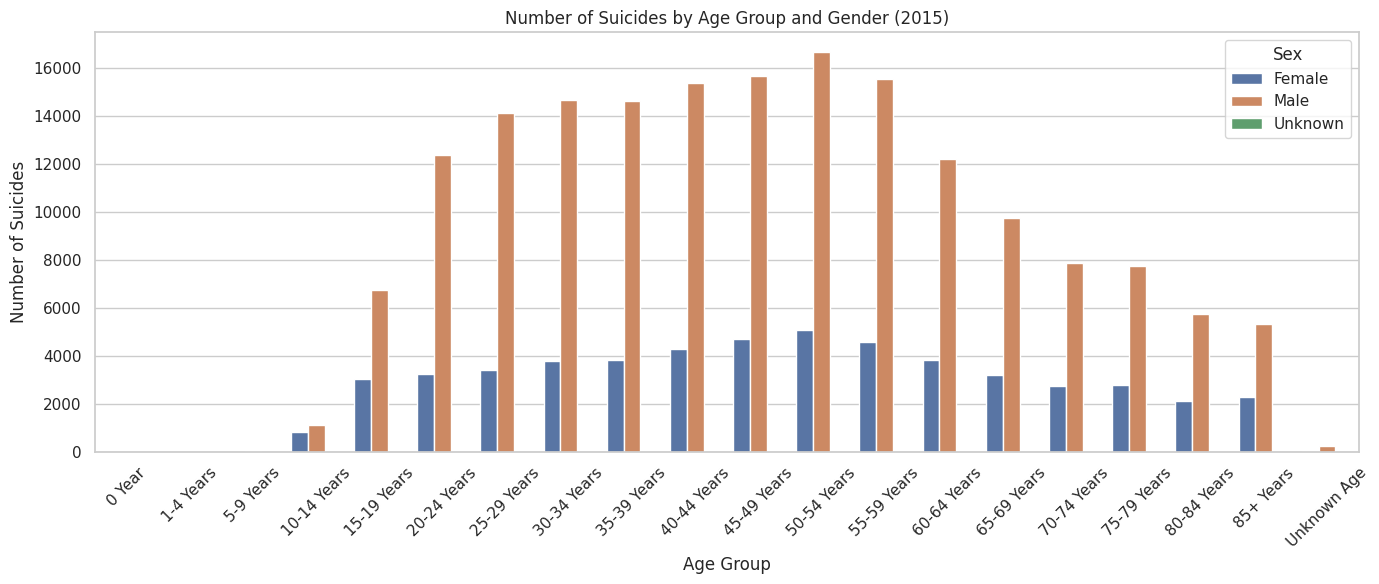

In [ ]:
# --- Visualization 2: 年龄+性别堆叠柱状图 ---
age_columns = df2.columns[4:24]
age_df = df2.groupby(['Year', 'Sex'])[age_columns].sum().reset_index()
age_df = age_df.melt(id_vars=['Year', 'Sex'], var_name='Age Group', value_name='Number of Suicides')

plt.figure(figsize=(14, 6))
sns.barplot(data=age_df[age_df['Year'] == 2015], x='Age Group', y='Number of Suicides', hue='Sex')
plt.xticks(rotation=45)
plt.title('Number of Suicides by Age Group and Gender (2015)')
plt.tight_layout()

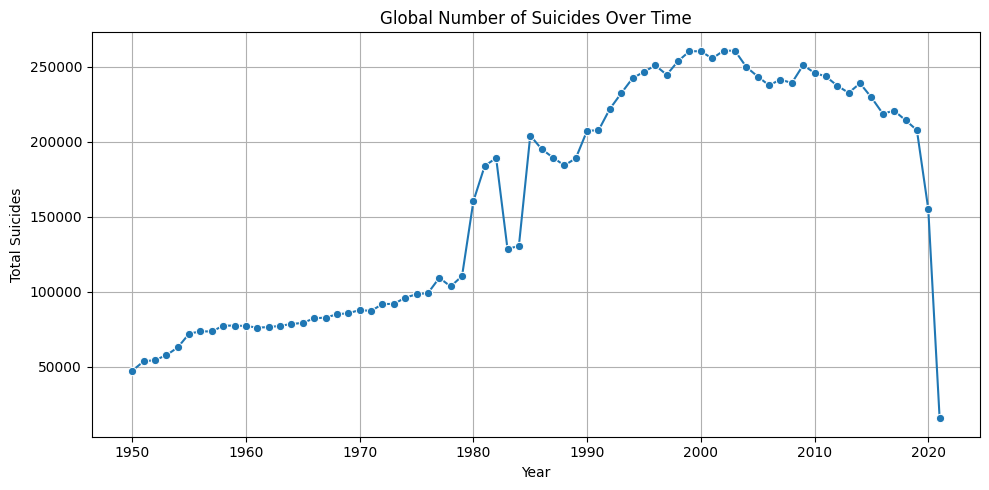

In [ ]:
# --- Visualization 3: 年份总趋势 ---
yearly_suicides = df2.groupby('Year')['No of Suicides'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_suicides, x='Year', y='No of Suicides', marker='o')
plt.title('Global Number of Suicides Over Time')
plt.xlabel('Year')
plt.ylabel('Total Suicides')
plt.grid(True)
plt.tight_layout()
plt.show()

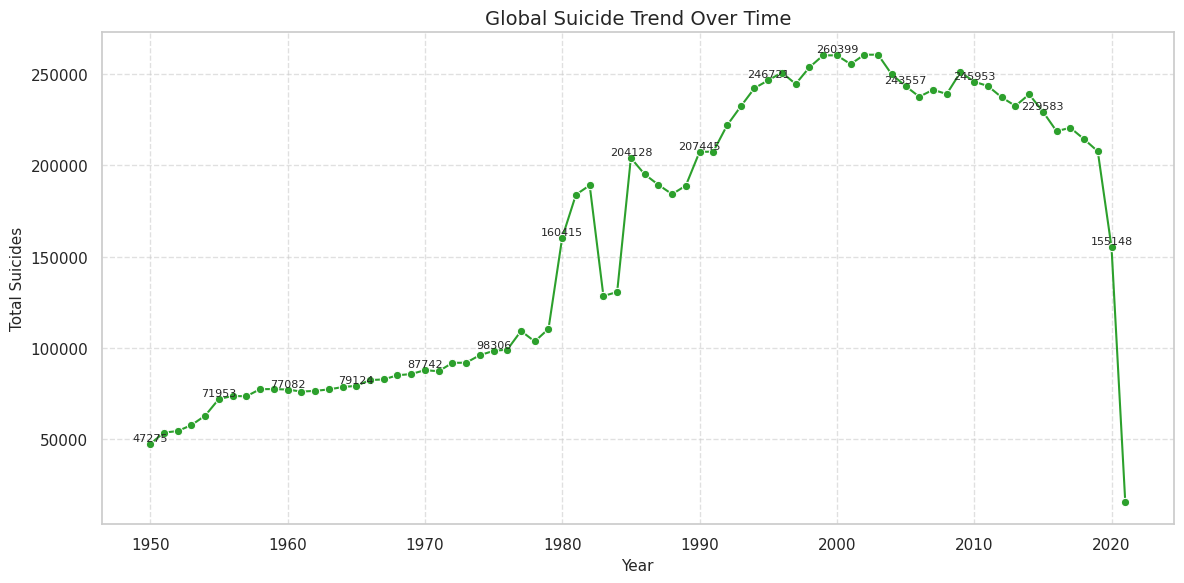

In [ ]:
sns.set(style="whitegrid")

# 绘图
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_suicides, x='Year', y='No of Suicides', marker='o', color='#2ca02c')

# 每隔五年标注一次
for x, y in zip(yearly_suicides['Year'], yearly_suicides['No of Suicides']):
    if x % 5 == 0:
        plt.text(x, y + 500, f'{int(y)}', ha='center', va='bottom', fontsize=8)

# 图表设置
plt.title('Global Suicide Trend Over Time', fontsize=14)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Total Suicides', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


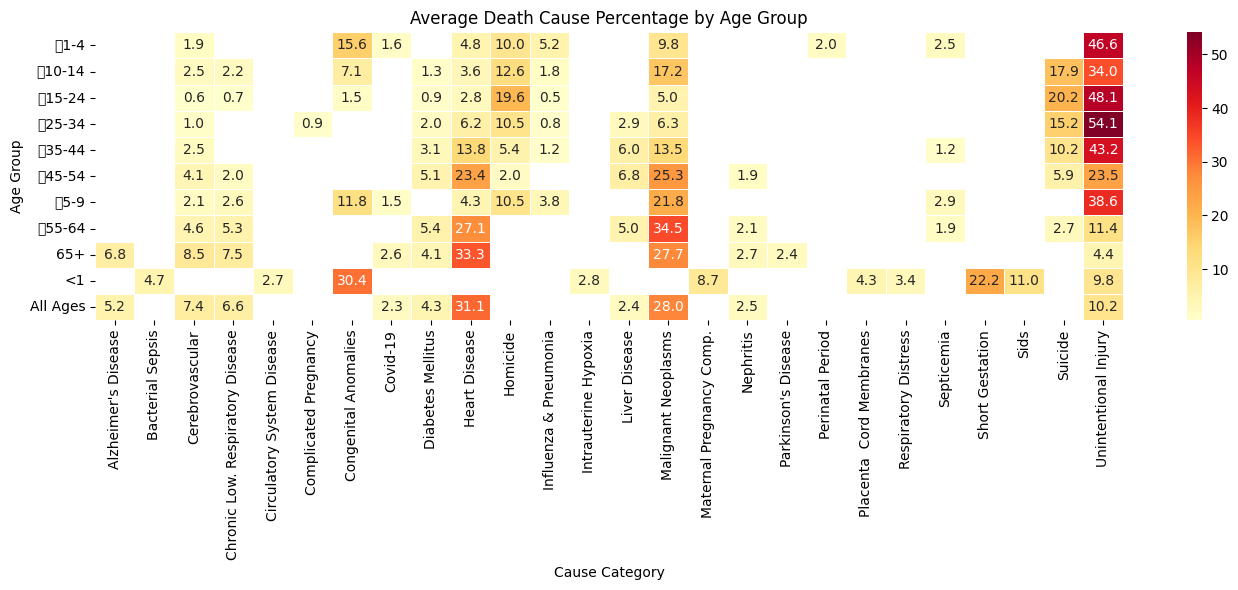

In [ ]:
df_heatmap = df.copy()

# %>>>float
df_heatmap["Percentage"] = df_heatmap["Percentage"].str.replace('%', '').astype(float)

# 生成透视表
heatmap_data = df_heatmap.pivot_table(
    index="Age Group",
    columns="Cause Category",
    values="Percentage",
    aggfunc='mean'
)

# 绘制热力图
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".1f", linewidths=.5)
plt.title("Average Death Cause Percentage by Age Group")
plt.ylabel("Age Group")
plt.xlabel("Cause Category")
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Create a copy of the dataframe and convert Percentage to float
df_heatmap = df.copy()
df_heatmap["Percentage"] = df_heatmap["Percentage"].str.replace('%', '').astype(float)

# Create pivot table for heatmap
heatmap_data = df_heatmap.pivot_table(
    index="Age Group",
    columns="Cause Category",
    values="Percentage",
    aggfunc='mean'
).reset_index()

# Melt the pivot table to long format for plotly
heatmap_long = heatmap_data.melt(id_vars="Age Group", var_name="Cause Category", value_name="Percentage")

# Plotly interactive heatmap
fig = px.density_heatmap(
    heatmap_long,
    x="Cause Category",
    y="Age Group",
    z="Percentage",
    color_continuous_scale="YlOrRd",
    text_auto=".1f"
)

fig.update_layout(
    title="Average Death Cause Percentage by Age Group",
    xaxis_title="Cause Category",
    yaxis_title="Age Group",
    xaxis_tickangle=45
)

fig.show()

In [ ]:
!pip install dash pandas plotly

import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html

# 读取并处理数据（确保你的 CSV 包含正确的列）
df = pd.read_csv("lcd-table.csv")

# 确保 Percentage 是字符串百分数格式
df["Percentage"] = df["Percentage"].str.replace('%', '', regex=False).astype(float)

# 创建透视表
heatmap_data = df.pivot_table(
    index="Age Group",
    columns="Cause Category",
    values="Percentage",
    aggfunc='mean'
).reset_index()

# 转换为长格式
heatmap_long = heatmap_data.melt(id_vars="Age Group", var_name="Cause Category", value_name="Percentage")

# 创建图像
fig = px.density_heatmap(
    heatmap_long,
    x="Cause Category",
    y="Age Group",
    z="Percentage",
    color_continuous_scale="YlOrRd",
    text_auto=".1f"
)

fig.update_layout(
    title="Average Death Cause Percentage by Age Group",
    xaxis_title="Cause Category",
    yaxis_title="Age Group",
    xaxis_tickangle=45
)

# 创建 Dash App
app = Dash(__name__)

app.layout = html.Div(children=[
    html.H1("Cause of Death Heatmap Dashboard"),
    dcc.Graph(figure=fig)
])

# 运行应用
if __name__ == "__main__":
    app.run(debug=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.6 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


<IPython.core.display.Javascript object>

In [ ]:
exit()